K Means Clustering Project

For this project I will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

It is very important to note, I actually have the labels for this data set, but I will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case I will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!

In [20]:
import numpy as np
import pandas as pd

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
#reading in the data, assigning school column as index
df = pd.read_csv('College_Data',index_col=0)

In [23]:
#quick exploration of the data
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


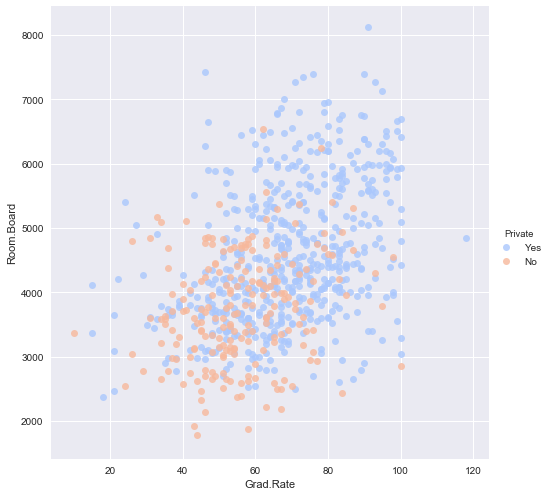

In [25]:
#Plotting Grad Rate against Roomboard, separated by Private classification
sns.lmplot('Grad.Rate','Room.Board',data=df,hue='Private',palette='coolwarm',fit_reg=False,size=7)

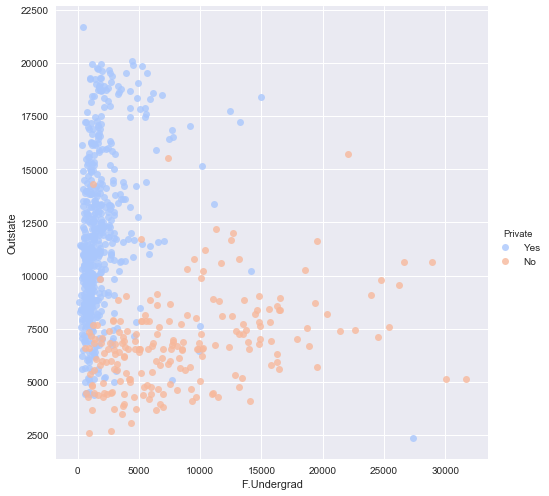

In [26]:
#Plotting F.Undergrad vs Outstate
sns.lmplot('F.Undergrad','Outstate',data=df,fit_reg=False,hue='Private',palette='coolwarm',size=7)

In [27]:
#Time to create the cluster labels
from sklearn.cluster import KMeans

In [28]:
#Two clusters, one private, one public
kmeans = KMeans(n_clusters=2)

In [29]:
#Fit the features, drop the Private labels 
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
#Taking a look at the cluster centers
kmeans.cluster_centers_

array([[  1.81323468e+03,   1.28716592e+03,   4.91044843e+02,
          2.53094170e+01,   5.34708520e+01,   2.18854858e+03,
          5.95458894e+02,   1.03957085e+04,   4.31136472e+03,
          5.41982063e+02,   1.28033632e+03,   7.04424514e+01,
          7.78251121e+01,   1.40997010e+01,   2.31748879e+01,
          8.93204634e+03,   6.51195815e+01],
       [  1.03631389e+04,   6.55089815e+03,   2.56972222e+03,
          4.14907407e+01,   7.02037037e+01,   1.30619352e+04,
          2.46486111e+03,   1.07191759e+04,   4.64347222e+03,
          5.95212963e+02,   1.71420370e+03,   8.63981481e+01,
          9.13333333e+01,   1.40277778e+01,   2.00740741e+01,
          1.41705000e+04,   6.75925926e+01]])

In [31]:
#There is no perfect way to evaluate clustering if you don't have the labels. 
#However since this is just an exercise, we do have the labels. 
#So we take advantage of this to evaluate our clusters. 
#Keep in mind, you usually won't have this luxury in the real world.
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [32]:
df['Cluster']=df['Private'].apply(converter)

In [33]:
#check the cluster column
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [34]:
#Since we have the labels, we can check the accuracy for learning's sake
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print('\n')
print(classification_report(df['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]


             precision    recall  f1-score   support

          0       0.21      0.65      0.31       212
          1       0.31      0.06      0.10       565

avg / total       0.29      0.22      0.16       777



In [ ]:
#Decent Recall score, not bad for just features